In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *
import pandas as pd
import seaborn as sns
import io #Used as buffer

# Read Data

In [95]:
path= Path(f'../../data/cluster_results')

In [96]:
def read_csv(f):
    df = pd.read_csv(f).mean()
    df['std'] = pd.read_csv(f).std().iloc[0] ##added line for std, remove this will remove std from table
    df['experiment'] = f.parent.parent.parent.name
    df['function'] = f.parent.parent.name
    name = f.parent.name
    #print(name)
    df['freq'] = float(name[4:].split('n')[0])
    #print(df['freq'])
    df['method'] = f.name.split('_')[0]+'_'+f.name.split('_')[1]
    #df['method'] = f.name.split('_')[0]
    #print(df['method'])
    return df

measure_name=['mof','sr','arr','nfe','nn_time']
index_measure=1

In [5]:
m = measure_name[index_measure]
files  = list(f for f in path.glob(f'exp*/*/freq*nn_p3nn_s3nn_tw5*bs4*/*{m}.csv') if 'NNnorm' in f.name)
# files += list(path.glob(f'exp*/*/*nn_p3/*{m}.csv'))
files += [f for f in path.glob(f'exp*/*/freq*nn_p3nn_s2nn_tw5*bs4*/*{m}.csv') if 'noNN' in f.name] #f'exp*/*/*nn_p3/*{m}.csv'  , 
#print(files)
df = pd.DataFrame([read_csv(f) for f in files])
df.rename({'0':m}, axis=1, inplace=True)
# data = pd.pivot_table(df, index=['experiment','function'], columns='method', values=m) #,'freq' later for adding frequency experiment
data = pd.pivot_table(df, index=['experiment','function','freq'],  columns='method') #,'freq' later for adding frequency experiment, ,values=m
data.style.format("{:,.2f}")

In [224]:
#to add std to table
final_data = data[m].copy()

for col in data[m].columns:
    final_data[col] = data[m][col].apply(lambda x: f'{x:,.2f} (±') + data['std'][col].apply(lambda x: f'{x:,.2f})')
final_data

method                        NNnorm_Random  NNnorm_Worst noNNReval_arr.csv
experiment function   freq                                                 
exp1       rastrigin  0.5      0.08 (±0.01)  0.08 (±0.01)      0.01 (±0.00)
                      1.0      0.16 (±0.06)  0.12 (±0.02)      0.01 (±0.00)
                      4.0   48.76 (±265.41)  0.30 (±0.10)      0.03 (±0.00)
           rosenbrock 0.5      0.21 (±0.01)  0.19 (±0.01)      0.02 (±0.01)
                      1.0      0.25 (±0.03)  0.26 (±0.01)      0.02 (±0.00)
                      4.0      0.42 (±0.12)  0.48 (±0.29)      0.02 (±0.00)
           sphere     0.5      0.32 (±0.02)  0.28 (±0.02)      0.02 (±0.01)
                      1.0      0.44 (±0.08)  0.50 (±0.01)      0.01 (±0.00)
                      4.0      0.65 (±0.02)  0.63 (±0.02)      0.03 (±0.00)
exp2       rastrigin  0.5      0.10 (±0.10)  0.13 (±0.09)      0.18 (±0.16)
                      1.0      0.28 (±0.13)  0.50 (±0.87)      0.13 (±0.07)
                      4.0      0.43 (±1.56)  0.35 (±0.74)      0.13 (±0.05)
           rosenbrock 0.5      0.27 (±0.01)  0.26 (±0.01)      0.26 (±0.04)
                      1.0      0.33 (±0.01)  0.34 (±0.01)      0.31 (±0.05)
                      4.0      0.51 (±0.04)  0.51 (±0.07)      0.38 (±0.01)
           sphere     0.5      0.44 (±0.03)  0.38 (±0.02)      0.44 (±0.09)
                      1.0      0.63 (±0.02)  0.68 (±0.01)      0.48 (±0.09)
                      4.0      0.84 (±0.02)  0.84 (±0.02)      0.53 (±0.20)
exp3       rastrigin  0.5      0.02 (±0.03)  0.02 (±0.00)      0.03 (±0.00)
                      1.0      0.02 (±0.00)  0.02 (±0.00)      0.02 (±0.00)
                      4.0      0.09 (±0.10)  0.07 (±0.09)      0.15 (±0.14)
           rosenbrock 0.5      0.27 (±0.05)  0.24 (±0.03)      0.41 (±0.04)
                      1.0      0.62 (±1.02)  0.36 (±0.03)      0.51 (±0.52)
                      4.0      0.93 (±0.07)  1.00 (±0.08)      1.65 (±0.55)
           sphere     0.5      0.27 (±0.01)  0.24 (±0.01)        nan (±nan)
                      1.0      0.38 (±0.05)  0.37 (±0.03)        nan (±nan)
                      4.0      0.47 (±0.10)  0.82 (±1.01)        nan (±nan)
exp4       rastrigin  0.5      0.29 (±0.02)  0.28 (±0.02)      0.05 (±0.03)
                      1.0      0.39 (±0.02)  0.39 (±0.02)      0.09 (±0.15)
                      4.0      0.62 (±0.03)  0.61 (±0.03)      0.11 (±0.08)
           rosenbrock 0.5      0.44 (±0.04)  0.41 (±0.06)      0.50 (±0.22)
                      1.0      0.54 (±0.08)  0.55 (±0.06)      0.36 (±0.10)
                      4.0      0.78 (±0.13)  0.76 (±0.03)      0.40 (±0.59)
           sphere     0.5      0.38 (±0.04)  0.40 (±0.06)      0.39 (±0.04)
                      1.0      0.51 (±0.04)  0.52 (±0.06)      0.26 (±0.04)
                      4.0      0.97 (±1.07)  0.80 (±0.33)      0.12 (±0.11)

# Latex

In [9]:
print(final_data.to_csv(float_format='%.2f'))

experiment,function,freq,NNnorm_Random,NNnorm_Worst,noNNReval_arr.csv
exp1,rastrigin,0.50,0.08 (±0.01),0.08 (±0.01),0.01 (±0.00)
exp1,rastrigin,1.00,0.16 (±0.06),0.12 (±0.02),0.01 (±0.00)
exp1,rastrigin,4.00,48.76 (±265.41),0.30 (±0.10),0.03 (±0.00)
exp1,rosenbrock,0.50,0.21 (±0.01),0.19 (±0.01),0.02 (±0.01)
exp1,rosenbrock,1.00,0.25 (±0.03),0.26 (±0.01),0.02 (±0.00)
exp1,rosenbrock,4.00,0.42 (±0.12),0.48 (±0.29),0.02 (±0.00)
exp1,sphere,0.50,0.32 (±0.02),0.28 (±0.02),0.02 (±0.01)
exp1,sphere,1.00,0.44 (±0.08),0.50 (±0.01),0.01 (±0.00)
exp1,sphere,4.00,0.65 (±0.02),0.63 (±0.02),0.03 (±0.00)
exp2,rastrigin,0.50,0.10 (±0.10),0.13 (±0.09),0.18 (±0.16)
exp2,rastrigin,1.00,0.28 (±0.13),0.50 (±0.87),0.13 (±0.07)
exp2,rastrigin,4.00,0.43 (±1.56),0.35 (±0.74),0.13 (±0.05)
exp2,rosenbrock,0.50,0.27 (±0.01),0.26 (±0.01),0.26 (±0.04)
exp2,rosenbrock,1.00,0.33 (±0.01),0.34 (±0.01),0.31 (±0.05)
exp2,rosenbrock,4.00,0.51 (±0.04),0.51 (±0.07),0.38 (±0.01)
exp2,sphere,0.50,0.44 (±0.03),0.38 (±0.02),0.

# Plots

In [10]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [11]:
# DataFrame we use for plots
d = data.reset_index()
d.columns = ['experiment', 'function', 'freq', 'NNR', 'NNW', 'noNN', 'NNR_std', 'NNW_std', 'noNN_std']
d.head(2)

,experiment,function,freq,NNR,NNW,noNN,NNR_std,NNW_std,noNN_std
0,exp1,rastrigin,0.5,0.080313,0.083220,0.010369,0.014215,0.007816,0.001645
1,exp1,rastrigin,1.0,0.160735,0.116393,0.011176,0.063486,0.018639,0.001191


In [12]:
d1 = d.melt(['experiment','function','freq'], value_vars=['NNR', 'NNW', 'noNN'],
            var_name='method', value_name='mof')
d2 = d.melt(['experiment','function','freq'], value_vars=['NNR_std', 'NNW_std', 'noNN_std'],
            var_name='method', value_name='mof_std')
d2.method = d2.method.str.replace('_std', '')
d = d1.merge(d2)
#d.head()

In [13]:
# test = d.query("experiment=='exp1' & freq==1").copy()
# mins = test.groupby('function')['mof'].min()
# mins

## Plots 0

In [87]:
test = d.query("experiment=='exp4'").copy()  # & freq==1"
mins = test.groupby('function')['mof'].min()
test['mof_norm'] = test['mof']
for k,v in mins.iteritems():
    test.loc[test.function==k,'mof_norm'] = test.loc[test.function==k,'mof']/v
#test.head()

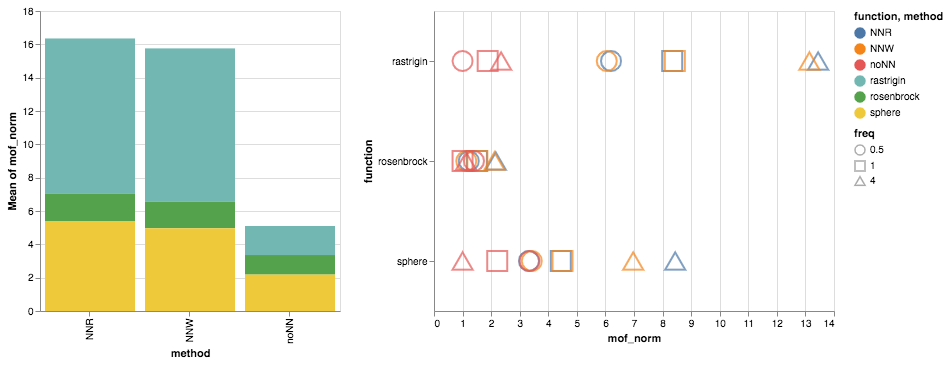

In [88]:
base = alt.Chart(test)
selector1 = alt.selection_single(fields=['method'])

chart1 = base.mark_bar().encode(
    alt.X('method'),
    alt.Y('mean(mof_norm)'),
    alt.Color('function'),
    opacity = alt.condition(selector1, alt.OpacityValue(1.0), alt.OpacityValue(0.1))
).properties(
    width=300
).add_selection(selector1)

chart2 = base.mark_point(size=400).encode(
    alt.X('mof_norm'),
    alt.Y('function'),
    alt.Color('method'),#function
    alt.Shape('freq:N'),
    alt.Tooltip(['mof_norm','mof','freq','function'])
).transform_filter(
    selector1
).properties(
#     width=200
    height=300
)

chart1|chart2

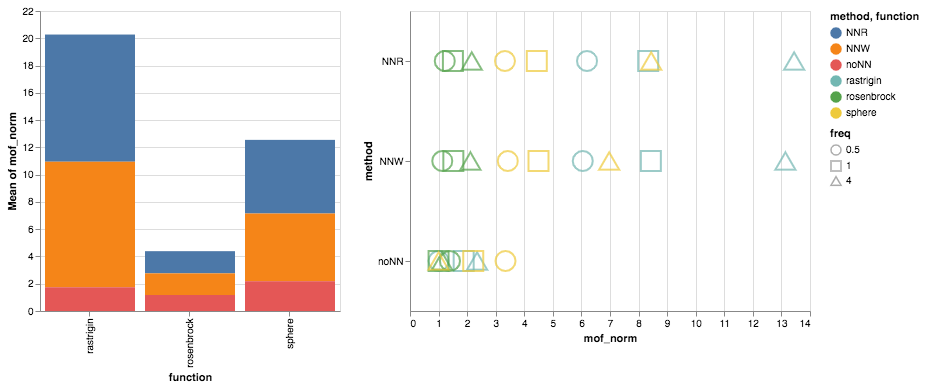

In [89]:
base = alt.Chart(test)
selector1 = alt.selection_single(fields=['function'])

chart1 = base.mark_bar().encode(
    alt.X('function'),
    alt.Y('mean(mof_norm)'),
    alt.Color('method'),
    opacity = alt.condition(selector1, alt.OpacityValue(1.0), alt.OpacityValue(0.1))
).properties(
    width=300
).add_selection(selector1)

chart2 = base.mark_point(size=400).encode(
    alt.X('mof_norm'),
    alt.Y('method'),
    alt.Color('function'),
    alt.Shape('freq:N'),
    alt.Tooltip(['mof_norm','mof','freq','function'])
).transform_filter(
    selector1
).properties(
#     width=200
    height=300
)

chart1|chart2.interactive()

## plot 1

In [31]:
def plot_experiment(exp):   
    test = d.query(f"experiment=={exp!r}").copy()
    mins = test.groupby('function')['mof'].min()
    test['mof_norm'] = test['mof']
    for k,v in mins.iteritems():
        test.loc[test.function==k,'mof_norm'] = test.loc[test.function==k,'mof']/v
    
    base = alt.Chart(test)
    selector1 = alt.selection_single(fields=['method'])

    chart1 = base.mark_bar().encode(
        alt.X('method', title=''),
        alt.Y('mean(mof_norm)', title=f'{exp} (mof_norm)'),
        alt.Color('function'),
#         alt.Column('function', title=''),
        opacity = alt.condition(selector1, alt.OpacityValue(1.0), alt.OpacityValue(0.1))
    ).properties(
        width=50, height=200
    ).add_selection(selector1)

    chart2 = base.mark_point(size=400).encode(
        alt.X('mof_norm'),
        alt.Y('function', title=''),
        alt.Color('method'),#function
        alt.Shape('freq:N'),
        alt.Tooltip(['mof_norm','mof','freq','function'])
    ).transform_filter(
        selector1
    ).properties(
        width=200, height=200
    )

    return chart1|chart2
    

In [34]:
chartworst=(plot_experiment('exp1'))&(plot_experiment('exp3'))
chartworst
chartworst.save(str(path/'chartworst.png'), scale_factor=2.0)
#|(plot_experiment('exp3'))&(plot_experiment('exp4'))

In [35]:
chartbest=(plot_experiment('exp2'))&(plot_experiment('exp4'))
chartbest
chartbest.save(str(path/'chartbest.png'), scale_factor=2.0)

## plot 2

In [476]:
def plot_exp(exp, axs, colors='method', x_axis='function'):
    test = d.query(f"experiment=={exp!r}").copy()
    mins = test.groupby('function')['mof'].min()
    test['mof_norm'] = test['mof']
    for k,v in mins.iteritems():
        test.loc[test.function==k,'mof_norm'] = test.loc[test.function==k,'mof']/v

    for (f,v),ax in zip(test.groupby('freq'),axs):
        sns.barplot(x=x_axis, y='mof_norm', data=v, hue=colors, ax=ax) #y='mof_norm'
        ax.set_title(f'freq={f}')
        ax.get_legend().remove()
    ax.legend(loc='best', bbox_to_anchor=(1.05, 0.52, 0.5, 0.5))
    for ax in axs[1:]: ax.set_ylabel('')
    for ax in axs: ax.set_xlabel('')

def plot_all_exp(colors='method', x_axis='function'):
    fig,axss = plt.subplots(4, 3, sharey=False, figsize=(10,12))
    for exp,axs in zip(['exp1','exp2','exp3','exp4'],axss): plot_exp(exp, axs, colors, x_axis)
    for axs in axss[1:]:
        for ax in axs: ax.set_title('')
    plt.tight_layout()

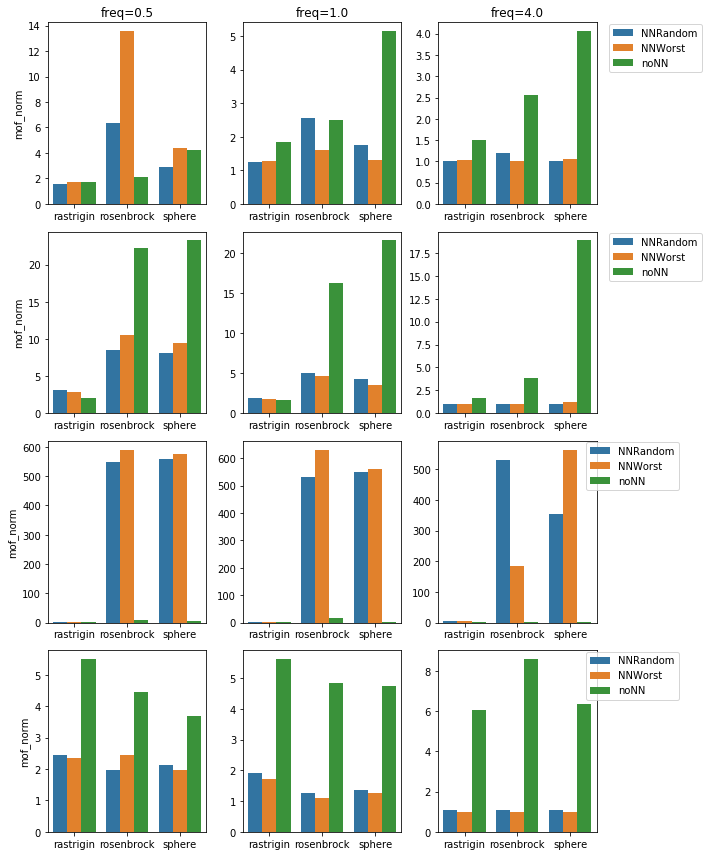

In [501]:
#method versus functions
freqMethod = plot_all_exp(colors='method', x_axis='function')
freqMethod

In [502]:
#freqMethod.save(str(path/'freqMethod.png'), scale_factor=2.0)

AttributeError: 'NoneType' object has no attribute 'save'

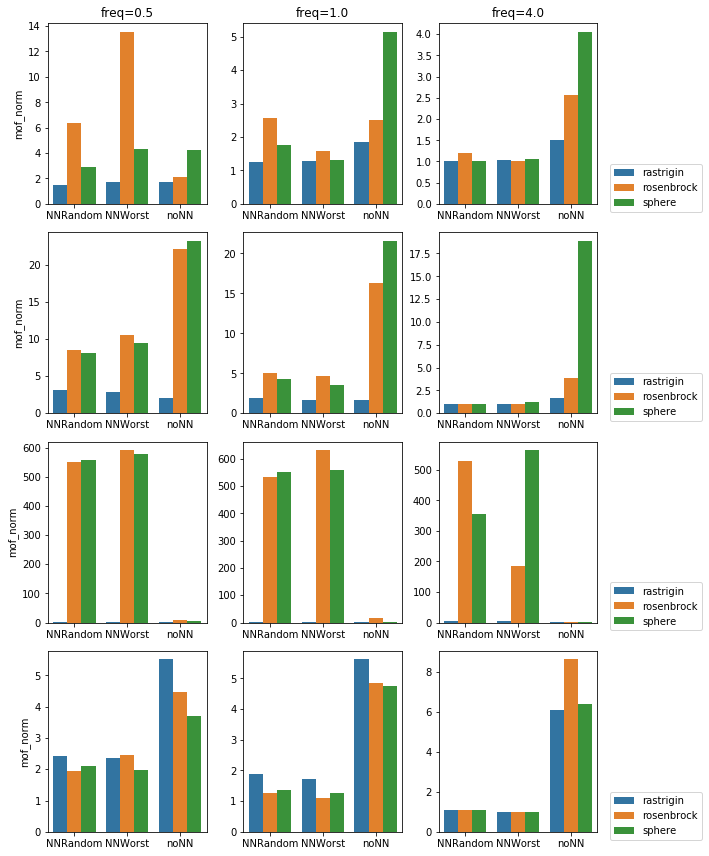

In [459]:
#functions versus methods
plot_all_exp(colors='function', x_axis='method')

# Arr plot

## Read Data

In [14]:
path= Path(f'../../data/cluster_results')

In [30]:
def read_csv(f):
    df = pd.read_csv(f).mean()
    df['std'] = pd.read_csv(f).std().iloc[0] ##added line for std, remove this will remove std from table
    df['experiment'] = f.parent.parent.parent.name
    df['function'] = f.parent.parent.name
    name = f.parent.name
    #print(name)
    df['freq'] = float(name[4:].split('n')[0])
    #print(df['freq'])
    df['method'] = f.name.split('_')[0]+'_'+f.name.split('_')[1]
    #df['method'] = f.name.split('_')[0]
    #print(df['method'])
    return df

measure_name=['mof','sr','arr','nfe','nn_time']
index_measure=2

In [31]:
m = measure_name[index_measure]
files  = list(f for f in path.glob(f'exp*/*/freq*nn_p3nn_s3nn_tw5*bs4*/*{m}.csv') if 'NNnorm' in f.name)
# files += list(path.glob(f'exp*/*/*nn_p3/*{m}.csv'))
files += [f for f in path.glob(f'exp*/*/freq*nn_p3nn_s2nn_tw5*bs4*/*{m}.csv') if 'noNN' in f.name] #f'exp*/*/*nn_p3/*{m}.csv'  , 
#print(files)
df = pd.DataFrame([read_csv(f) for f in files])
df.rename({'0':m}, axis=1, inplace=True)
# data = pd.pivot_table(df, index=['experiment','function'], columns='method', values=m) #,'freq' later for adding frequency experiment
data = pd.pivot_table(df, index=['experiment','function','freq'],  columns='method') #,'freq' later for adding frequency experiment, ,values=m
data.style.format("{:,.2f}")

In [32]:
#to add std to table
final_data = data[m].copy()

for col in data[m].columns:
    final_data[col] = data[m][col].apply(lambda x: f'{x:,.2f} (±') + data['std'][col].apply(lambda x: f'{x:,.2f})')
final_data

method                        NNnorm_Random  NNnorm_Worst noNNReval_arr.csv
experiment function   freq                                                 
exp1       rastrigin  0.5      0.08 (±0.01)  0.08 (±0.01)      0.01 (±0.00)
                      1.0      0.16 (±0.06)  0.12 (±0.02)      0.01 (±0.00)
                      4.0   48.76 (±265.41)  0.30 (±0.10)      0.03 (±0.00)
           rosenbrock 0.5      0.21 (±0.01)  0.19 (±0.01)      0.02 (±0.01)
                      1.0      0.25 (±0.03)  0.26 (±0.01)      0.02 (±0.00)
                      4.0      0.42 (±0.12)  0.48 (±0.29)      0.02 (±0.00)
           sphere     0.5      0.32 (±0.02)  0.28 (±0.02)      0.02 (±0.01)
                      1.0      0.44 (±0.08)  0.50 (±0.01)      0.01 (±0.00)
                      4.0      0.65 (±0.02)  0.63 (±0.02)      0.03 (±0.00)
exp2       rastrigin  0.5      0.10 (±0.10)  0.13 (±0.09)      0.18 (±0.16)
                      1.0      0.28 (±0.13)  0.50 (±0.87)      0.13 (±0.07)
                      4.0      0.43 (±1.56)  0.35 (±0.74)      0.13 (±0.05)
           rosenbrock 0.5      0.27 (±0.01)  0.26 (±0.01)      0.26 (±0.04)
                      1.0      0.33 (±0.01)  0.34 (±0.01)      0.31 (±0.05)
                      4.0      0.51 (±0.04)  0.51 (±0.07)      0.38 (±0.01)
           sphere     0.5      0.44 (±0.03)  0.38 (±0.02)      0.44 (±0.09)
                      1.0      0.63 (±0.02)  0.68 (±0.01)      0.48 (±0.09)
                      4.0      0.84 (±0.02)  0.84 (±0.02)      0.53 (±0.20)
exp3       rastrigin  0.5      0.02 (±0.03)  0.02 (±0.00)      0.03 (±0.00)
                      1.0      0.02 (±0.00)  0.02 (±0.00)      0.02 (±0.00)
                      4.0      0.09 (±0.10)  0.07 (±0.09)      0.15 (±0.14)
           rosenbrock 0.5      0.27 (±0.05)  0.24 (±0.03)      0.41 (±0.04)
                      1.0      0.62 (±1.02)  0.36 (±0.03)      0.51 (±0.52)
                      4.0      0.93 (±0.07)  1.00 (±0.08)      1.65 (±0.55)
           sphere     0.5      0.27 (±0.01)  0.24 (±0.01)        nan (±nan)
                      1.0      0.38 (±0.05)  0.37 (±0.03)        nan (±nan)
                      4.0      0.47 (±0.10)  0.82 (±1.01)        nan (±nan)
exp4       rastrigin  0.5      0.29 (±0.02)  0.28 (±0.02)      0.05 (±0.03)
                      1.0      0.39 (±0.02)  0.39 (±0.02)      0.09 (±0.15)
                      4.0      0.62 (±0.03)  0.61 (±0.03)      0.11 (±0.08)
           rosenbrock 0.5      0.44 (±0.04)  0.41 (±0.06)      0.50 (±0.22)
                      1.0      0.54 (±0.08)  0.55 (±0.06)      0.36 (±0.10)
                      4.0      0.78 (±0.13)  0.76 (±0.03)      0.40 (±0.59)
           sphere     0.5      0.38 (±0.04)  0.40 (±0.06)      0.39 (±0.04)
                      1.0      0.51 (±0.04)  0.52 (±0.06)      0.26 (±0.04)
                      4.0      0.97 (±1.07)  0.80 (±0.33)      0.12 (±0.11)

## show plots

In [33]:
plot_df = data['arr'].reset_index()
plot_df.rename({'NNnorm_Random':'NNR', 'NNnorm_Worst':'NNW', 'noNNReval_sr.csv':'noNN'}, axis=1, inplace=True)
#plot_df.head()

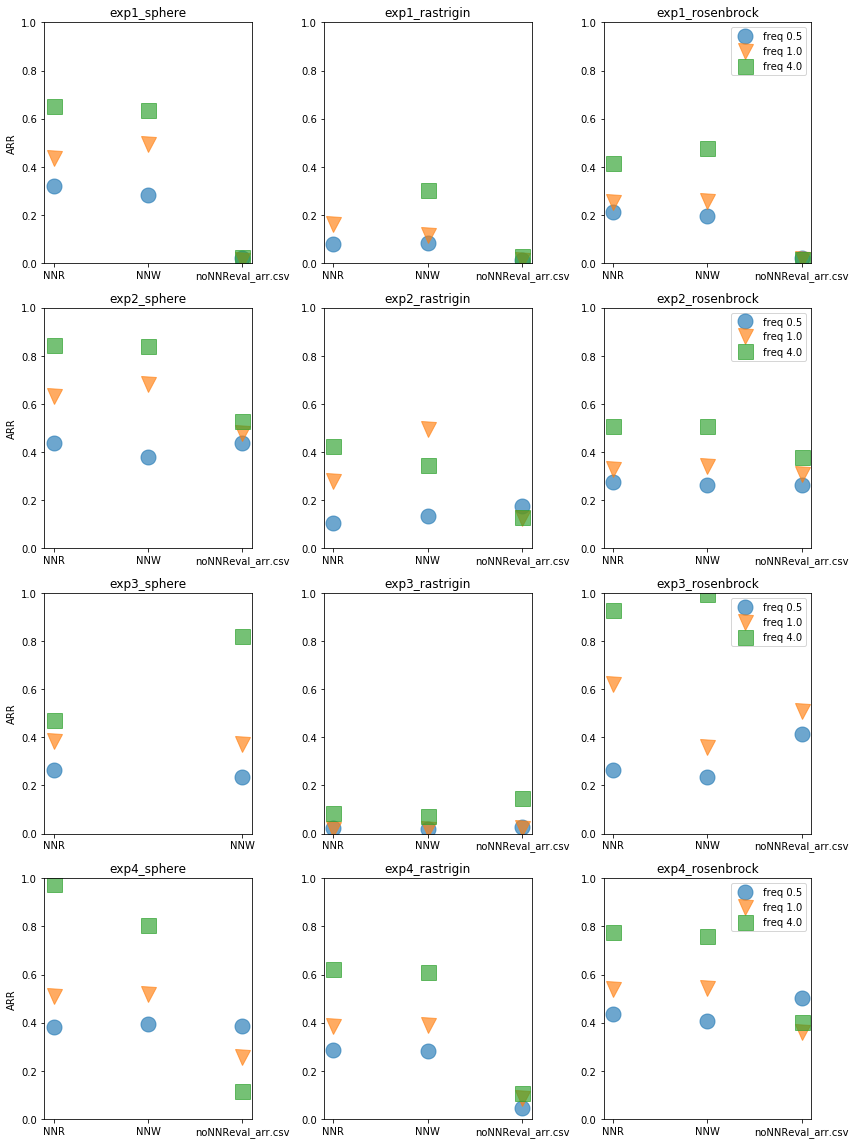

In [34]:
fig,axss = plt.subplots(4, 3, figsize=(12,16))
experiments = ['exp1','exp2','exp3','exp4']
functions = ['sphere','rastrigin','rosenbrock']
freqs = [0.5, 1.0, 4.0]
for exp,axs in zip(experiments,axss):
    axs[0].set_ylabel('ARR')#exp
    for func,ax in zip(functions,axs):
        t = (plot_df[(plot_df.function==func)&(plot_df.experiment==exp)]
                    .drop(['experiment','function'], axis=1)
                    .set_index('freq'))
        for freq,symbol in zip(freqs,['o','v','s']):
            ax.plot(t.loc[freq], symbol, markersize=15, alpha=0.65, label=f'freq {freq:0.1f}')
            
        ax.set_title(f'{exp}_{func}')
        ax.set_ylim(0,1)
    ax.legend()
plt.tight_layout()

### average based on functions

In [22]:
fig,axs = plt.subplots(1, 4, figsize=(14,4))
experiments = ['exp1','exp2','exp3','exp4']
functions = ['sphere','rastrigin','rosenbrock']
freqs = [0.5, 1.0, 4.0]
for exp,ax in zip(experiments,axs):
#     axs[0].set_ylabel(exp)
    t = (plot_df[plot_df.experiment==exp]
                .drop(['experiment'], axis=1)
                .groupby('freq').mean())
    for freq,symbol in zip(freqs,['o','v','s']):
        ax.plot(t.loc[freq], symbol, markersize=15, alpha=0.65, label=f'freq {freq:0.1f}')

    ax.set_title(f'{`zexp}')
    ax.set_ylim(0,1)
axs[-1].legend()
plt.tight_layout()

SyntaxError: invalid syntax (<fstring>, line 1)

In [173]:
t = (plot_df[plot_df.experiment=='exp3']
                .drop(['experiment'], axis=1)
#                 .groupby('freq')
    )

In [174]:
t

method,function,freq,NNR,NNW,noNN
18,rastrigin,0.5,0.023920,0.019520,0.026278
19,rastrigin,1.0,0.019104,0.019256,0.021273
20,rastrigin,4.0,0.086636,0.073897,0.145885
21,rosenbrock,0.5,0.266350,0.236900,0.413824
22,rosenbrock,1.0,0.622255,0.360021,0.509239
23,rosenbrock,4.0,0.929130,0.997276,1.650545
24,sphere,0.5,0.265134,0.237178,NaN
25,sphere,1.0,0.383014,0.371734,NaN
26,sphere,4.0,0.472202,0.820566,NaN


# Final Plot

## functions

In [210]:
def get_files(m):
    files  = list(f for f in path.glob(f'exp*/*/freq*nn_p3nn_s3nn_tw5*bs4*/*{m}.csv') if 'NNnorm' in f.name)
    files += [f for f in path.glob(f'exp*/*/freq*nn_p3nn_s2nn_tw5*bs4*/*{m}.csv') if 'noNN' in f.name]
    return files

In [211]:
def read_csv(f,m):
    df = pd.read_csv(f)
    df['experiment'] = f.parent.parent.parent.name
    df['function'] = f.parent.parent.name
    name = f.parent.name
    df['freq'] = float(name[4:].split('n')[0])
    df['method'] = f.name.split('_')[0]+'_'+f.name.split('_')[1]
#     df['method'] = f.name.split('_')[0]
    df.rename({'0':m.upper(), m:m.upper()}, axis=1, inplace=True)
    return df

In [212]:
def get_data(m):
    short_dict = {'NNnorm_Random':'NNR', 'NNnorm_Worst':'NNW', 'noNNReval_sr.csv':'noNN',
                  'noNNReval_arr.csv':'noNN', 'noNNReval_mof.csv':'noNN'}
    files = get_files(m)
    data = pd.concat([read_csv(f,m) for f in files])
    data.method = data.method.apply(lambda x: short_dict[x])
    return data

In [298]:
col_by_freq = True
col_palette = 'Set3'
def plot_one(data, m, title='', title_size=14, col_by_freq=col_by_freq, col_palette=col_palette,
             legend=False, hide_x=True, hide_y=True, ax=None, do_lim=True, ll=0.2, ul=0.8):
    if ax is None: fig,ax = plt.subplots(1,1,figsize=(6,4))
    sns.boxplot('method' if col_by_freq else 'freq', m.upper(), hue='freq' if col_by_freq else 'method',
                data=data, palette=col_palette,
                # width=2.5,
                linewidth=0.5, fliersize=0, ax=ax)
    if not legend: ax.get_legend().remove()
    if do_lim:
        ax.set_ylim(0,1)
    else:
        g = data.groupby(['method','freq'])[m.upper()]
        q1,q3 = g.quantile(ll),g.quantile(ul)
        iqr = q3-q1
        lower_lim = (q1 - 1.5*iqr).min()
        upper_lim = (q3 + 1.5*iqr).max()
        lower_lim = data[m.upper()][data[m.upper()]>=lower_lim].min()
        upper_lim = data[m.upper()][data[m.upper()]<=upper_lim].max()
        ax.set_ylim(lower_lim,upper_lim)
        
    ax.set_xlabel('')
    if hide_x: ax.set_xticklabels([])
    if hide_y: ax.set_ylabel('')
    ax.set_title(title, size=title_size)
    return ax

In [299]:
def plot_all(m, title_size=12, col_by_freq=col_by_freq, col_palette=col_palette, do_lim=True, ll=0.2, ul=0.8):
    data = get_data(m)
    fig,axss = plt.subplots(4, 3, figsize=(14,16), sharex=do_lim, sharey=do_lim)
    for i,(axs,exp) in enumerate(zip(axss,['exp1','exp2','exp3','exp4'])):
        first_exp = i==0
        for j,(ax,func) in enumerate(zip(axs,['sphere', 'rosenbrock', 'rastrigin'])):
            first_func = j==0
            test = data.query(f'experiment=={exp!r} and function=={func!r}')
            plot_one(test, m, f'{exp}-{func.title()}', title_size=title_size, hide_x=False, hide_y=not first_func,
                     col_by_freq=col_by_freq, col_palette=col_palette, ax=ax, do_lim=do_lim, ll=ll, ul=ul)
        ax.legend(loc='upper right')
    plt.tight_layout()
    return fig,axss

## Plots

In [215]:
path= Path(f'../../data/cluster_results')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


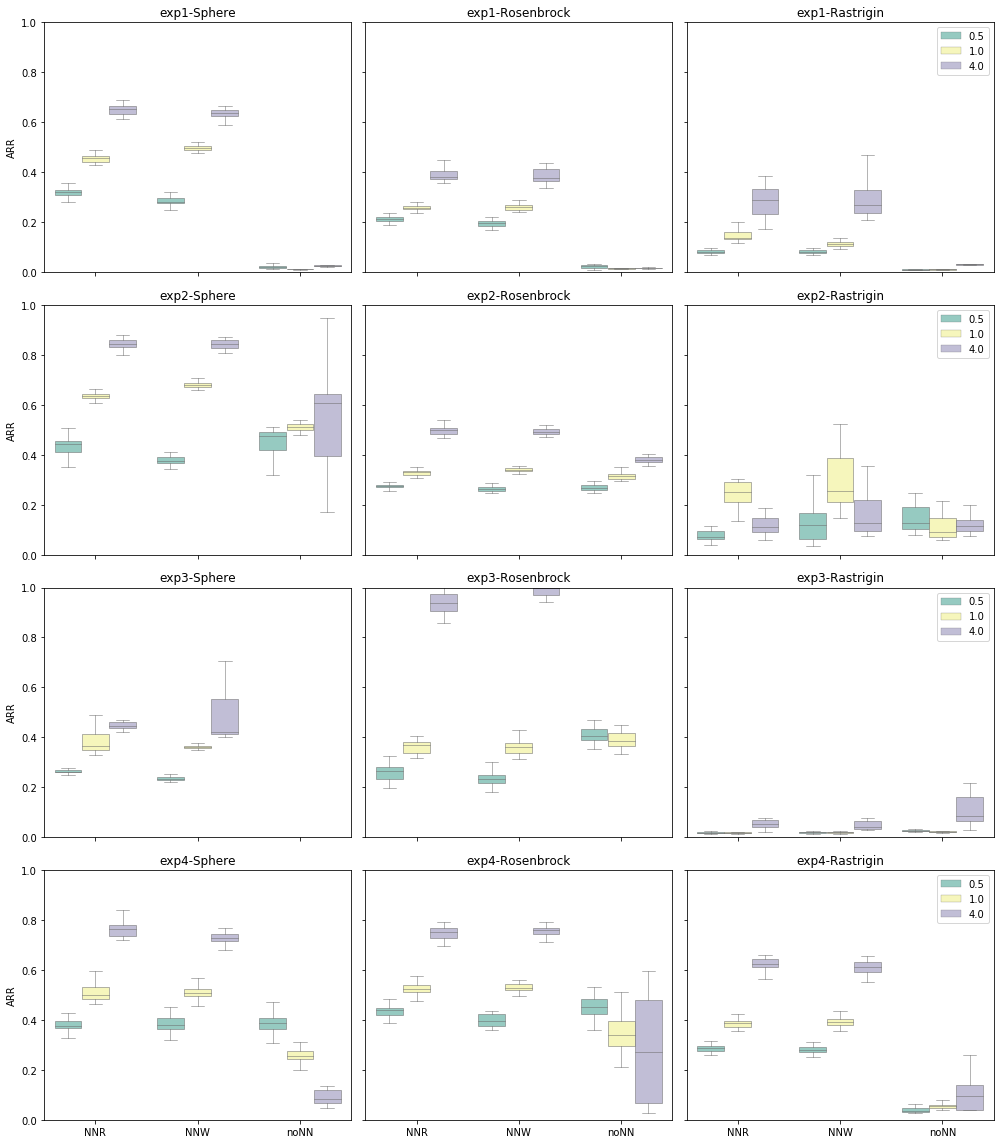

In [180]:
fig,axs = plot_all('arr', title_size=12, col_by_freq=True, col_palette='Set3')
fig.savefig(path/'ARR.eps', dpi=400, format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


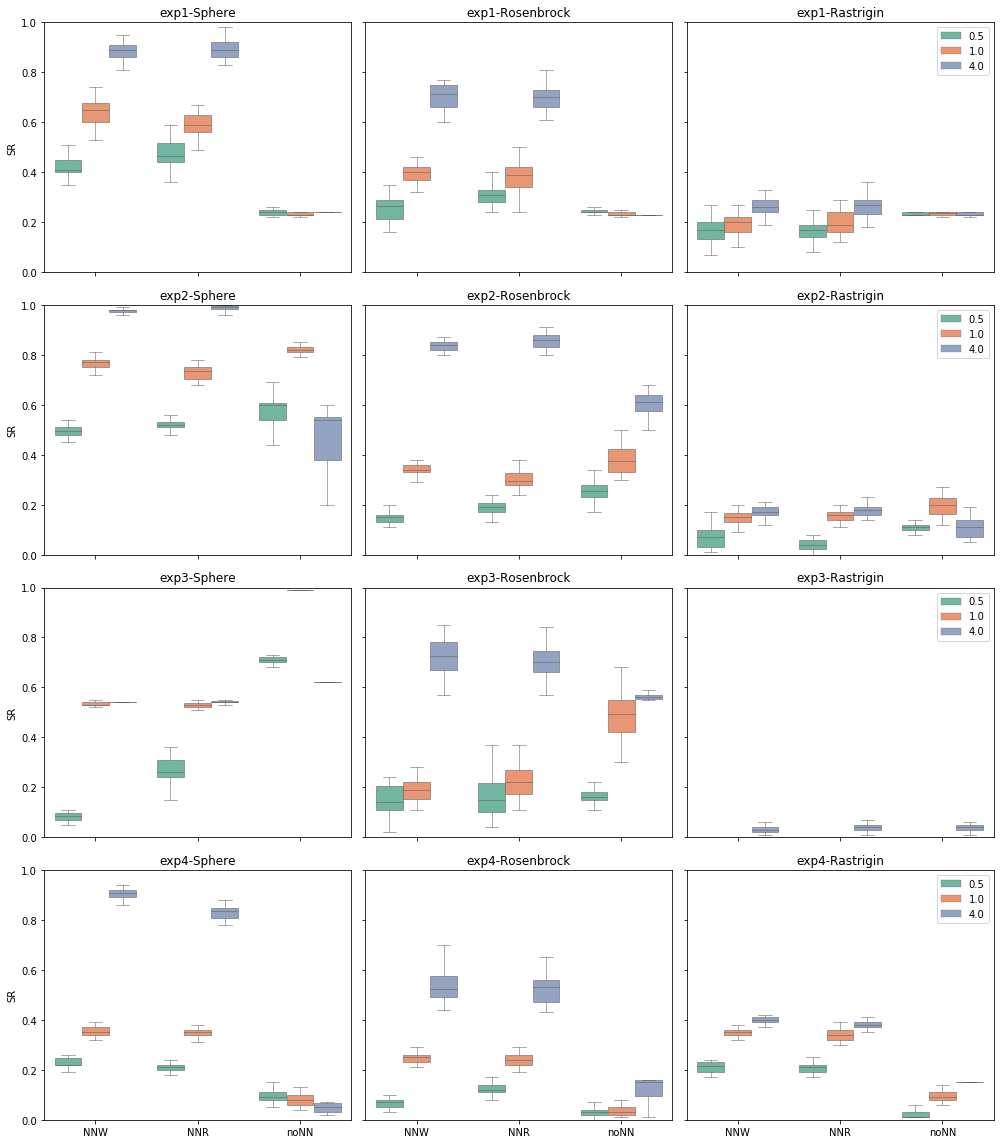

In [181]:
fig,axs = plot_all('sr', title_size=12, col_by_freq=True, col_palette='Set2')
fig.savefig(path/'SR.eps', dpi=400, format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


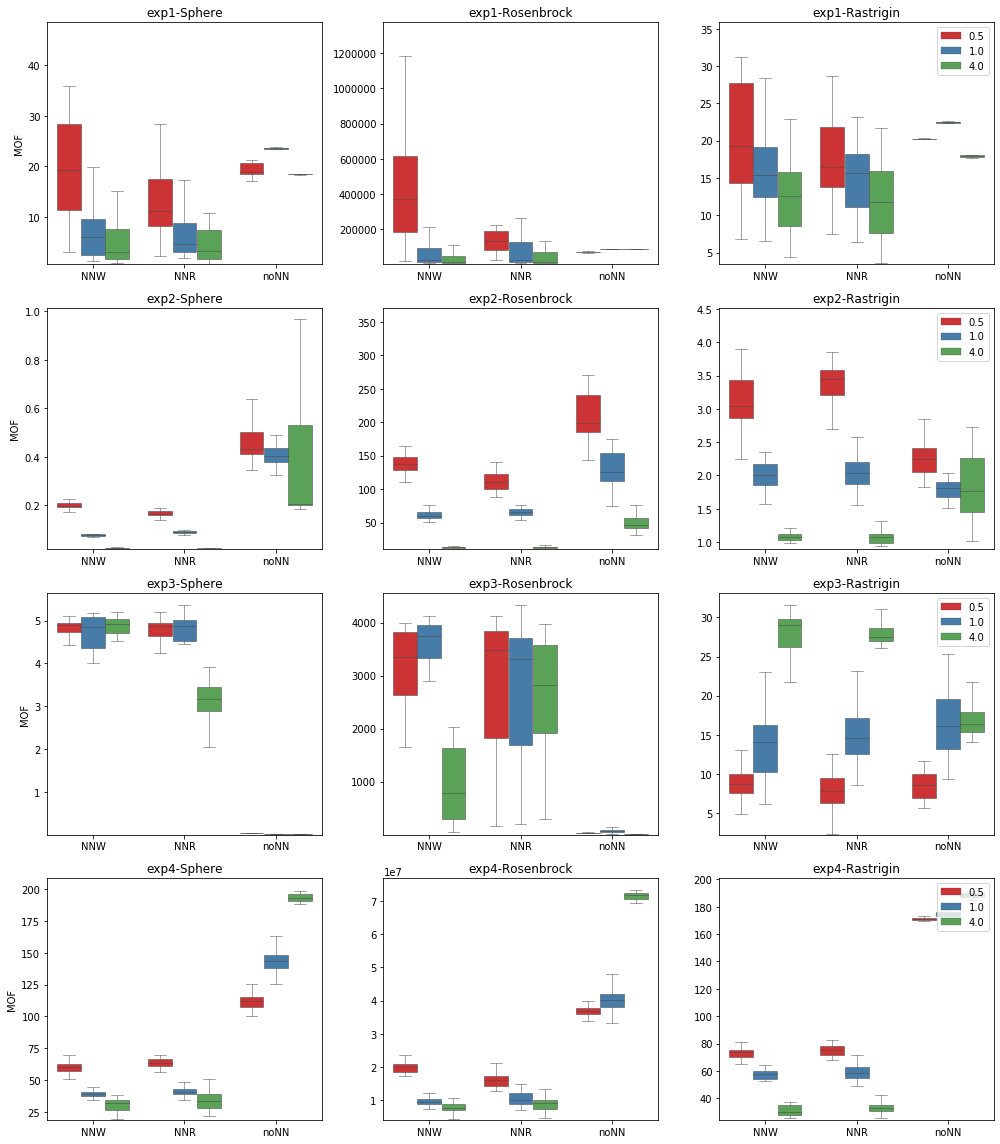

In [311]:
fig,axs = plot_all('mof', title_size=12, col_by_freq=True, col_palette='Set1', do_lim=False, ll=0.2, ul=0.8)
for ax in axs.flatten():
    ll,ul = ax.get_ylim()
    ax.set_ylim(ll*0.95, ul*1.05)
    
fig.savefig(path/'MOF.eps', dpi=400, format='eps')

# ----